I ran a mini-batch k-means and hierarchical clustering.
Elbow plot for the former never seem to flatten, even with 30 clusters, the latter took too long to run.

In [11]:
# load packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")


In [1]:
# load data
from preprocess import load_for_training
path_to_data = 'census-income.data'
path_to_columns = 'census-income.columns'
df, var_cont,var_disc = load_for_training(path_to_data,path_to_columns,make_dummies=True)

w = df['instance weight']
x = df.drop(columns=['instance weight'])

In [65]:
# mini batch k-means
from sklearn.cluster import MiniBatchKMeans
def run_kmeans(x,w,batch_size=30,cluster_range=20):

    inertias = []
    for n_clusters in range(1,cluster_range+1):
        model = MiniBatchKMeans(n_clusters=n_clusters,batch_size=batch_size)
        model.fit(x,sample_weight=w)
        inertias.append(model.inertia_)

    return inertias

def plot_inertias(inertias,fig_size_x=8,fig_size_y=8,save_path=None):
    hor_axis = list(range(1,len(inertias)+1))    
    plt.figure(figsize=(fig_size_x,fig_size_y))
#     plt.plot(hor_axis,inertias)
    sns.lineplot(hor_axis,inertias)
    sns.scatterplot(hor_axis,inertias)
    plt.xlabel('number of clusters')
    plt.ylabel('inertia')
    plt.xticks(hor_axis)
#     plt.xlim(0,len(inertias))
    plt.ylim(0)
    sns.despine()
    if save_path:
        plt.savefig(save_path)

In [67]:
batch_size = 10000
cluster_range = 20
inertias = run_kmeans(x,w,batch_size=batch_size,cluster_range=cluster_range)

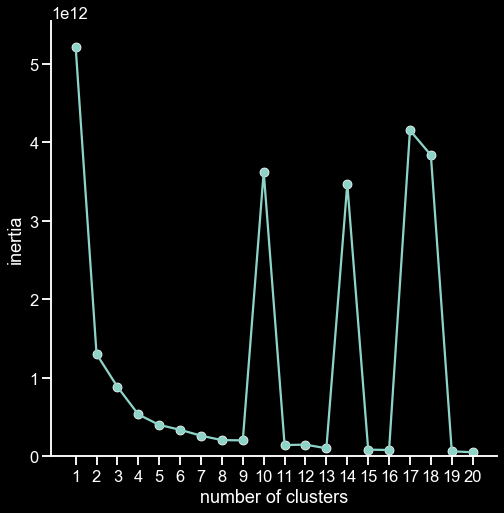

In [68]:
plot_inertias(inertias)

In [69]:
from sklearn.cluster import KMeans
full_model = KMeans(n_clusters=4)
full_model.fit(x,sample_weight=w)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [71]:
log_name = 'mitch.log'
output = 'name = mitch\n'
output += 'type = KMeans\n'
output += 'n_clusters = 4\n'
with open('models/'+log_name, 'w') as f:
    f.write(output)

In [73]:
from sklearn.externals import joblib
filename = 'models/mitch.sav'
joblib.dump(full_model, filename)

['models/mitch.sav']

In [74]:
new_model = joblib.load(filename)

In [75]:
type(new_model)

sklearn.cluster._kmeans.KMeans

In [78]:
new_model.predict(x).sum()

7580

In [79]:
# let's make a bunch of plots